# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('train.csv', parse_dates=['date'])
events = pd.read_csv('calendar_events.csv', parse_dates=['date'])

#PREPROCESS
#Extract store name
def parse_store_name(df):
    # Use Unicode en dash '–' (U+2013), surrounded by spaces as seen in data
    split_cols = df['store_name'].str.split(' – ', n=1, expand=True)

    # Ensure there are always 2 columns
    if split_cols.shape[1] == 1:
        split_cols[1] = None  # add a second column if needed

    # Replace missing values with 'All Stores'
    split_cols = split_cols.fillna('All Stores')

    # Rename and assign
    split_cols.columns = ['country', 'store']
    df[['country', 'store']] = split_cols

    return df

def merge_events(df, events):
    df = df.merge(events, on='date', how='left')
    return df


df = parse_store_name(df)
df = merge_events(df, events)

df.head()

,store_id,store_name,date,revenue,country,store,event
0,0,All Stores,2011-01-29,204126.52,All Stores,All Stores,NaN
1,0,All Stores,2011-01-30,197426.42,All Stores,All Stores,NaN
2,0,All Stores,2011-01-31,144267.27,All Stores,All Stores,NaN
3,0,All Stores,2011-02-01,151903.00,All Stores,All Stores,NaN
4,0,All Stores,2011-02-02,117399.88,All Stores,All Stores,NaN


In [2]:
df.describe(include='all')

,store_id,store_name,date,revenue,country,store,event
count,18766.000000,18766,18766,18766.000000,18766,18766,1507
unique,NaN,11,NaN,NaN,4,11,34
top,NaN,All Stores,NaN,NaN,California,All Stores,SuperBowl
freq,NaN,1706,NaN,NaN,6824,1706,55
mean,5.000000,NaN,2013-05-30 12:00:00,43101.355174,NaN,NaN,NaN
min,0.000000,NaN,2011-01-29 00:00:00,0.000000,NaN,NaN,NaN
25%,2.000000,NaN,2012-03-30 00:00:00,17746.470000,NaN,NaN,NaN
50%,5.000000,NaN,2013-05-30 12:00:00,23064.675000,NaN,NaN,NaN
75%,8.000000,NaN,2014-07-31 00:00:00,31238.132500,NaN,NaN,NaN
max,10.000000,NaN,2015-09-30 00:00:00,394304.000000,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18766 entries, 0 to 18765
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   store_id    18766 non-null  int64         
 1   store_name  18766 non-null  object        
 2   date        18766 non-null  datetime64[ns]
 3   revenue     18766 non-null  float64       
 4   country     18766 non-null  object        
 5   store       18766 non-null  object        
 6   event       1507 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 1.0+ MB


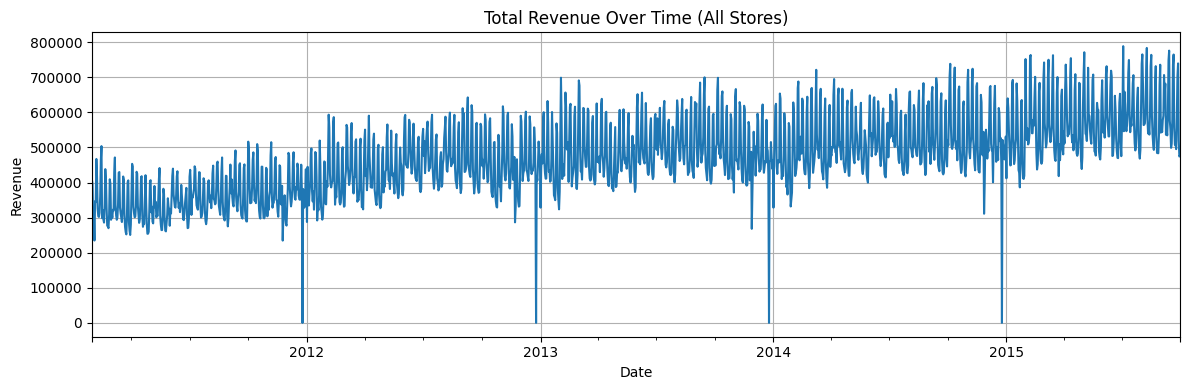

In [4]:
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])
df_all = df.groupby('date')['revenue'].sum()

plt.figure(figsize=(12, 4))
df_all.plot(title='Total Revenue Over Time (All Stores)')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

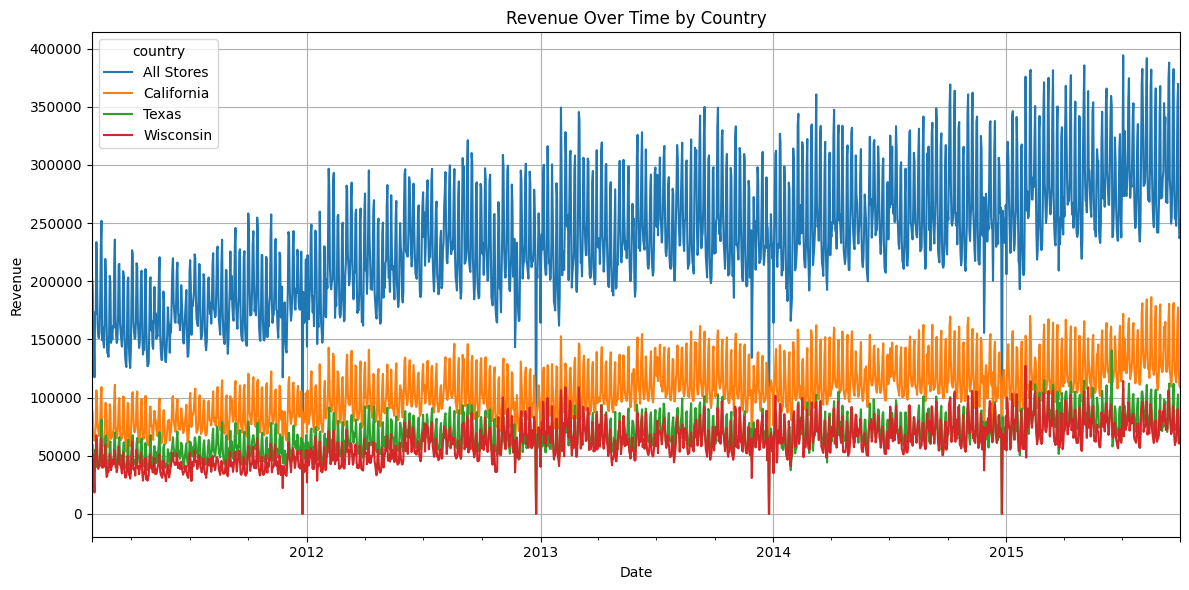

In [5]:
df_country = df.groupby(['date', 'country'])['revenue'].sum().unstack()

df_country.plot(figsize=(12, 6), title='Revenue Over Time by Country')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

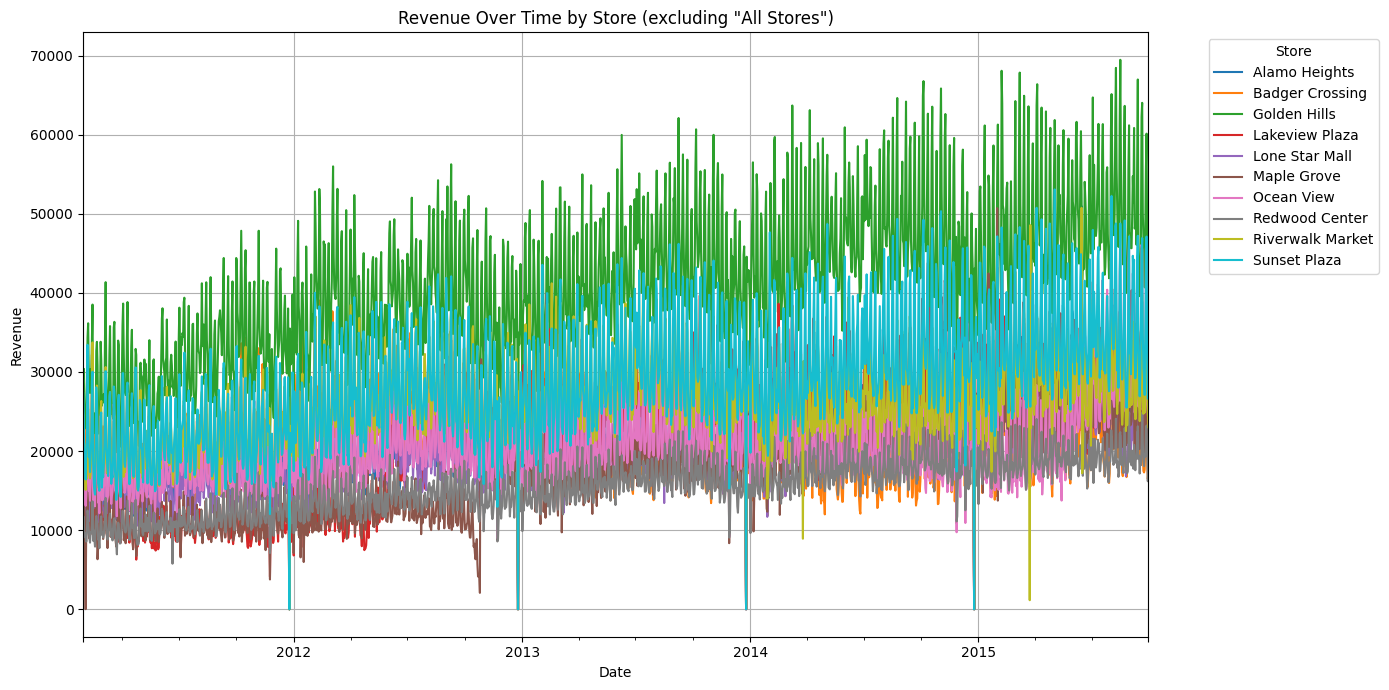

In [6]:
# Filter out "All Stores" label
df_filtered = df[df['store'] != 'All Stores']

# Group by date and store, then pivot for plotting
df_store = df_filtered.groupby(['date', 'store'])['revenue'].sum().unstack()

# Plot all stores (excluding "All Stores")
plt.figure(figsize=(14, 7))
df_store.plot(title='Revenue Over Time by Store (excluding "All Stores")', figsize=(14, 7))
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.grid(True)
plt.legend(title='Store', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Compare Revenue on Event vs. Non-Event Days 

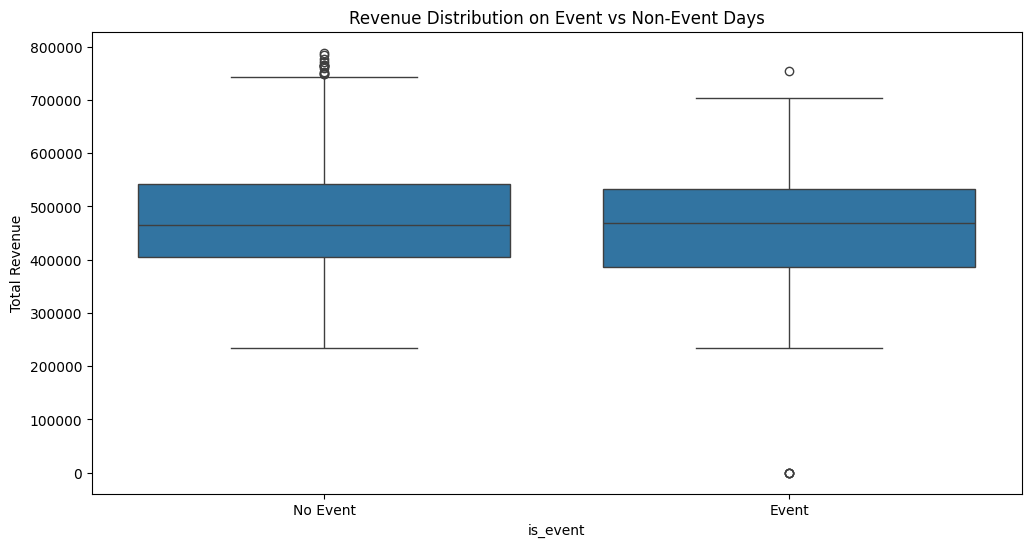

In [7]:
import seaborn as sns

df['is_event'] = df['event'].notna()

# Aggregate total revenue per day
daily_revenue = df.groupby(['date', 'is_event'])['revenue'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=daily_revenue, x='is_event', y='revenue')
plt.title("Revenue Distribution on Event vs Non-Event Days")
plt.xticks([0, 1], ['No Event', 'Event'])
plt.ylabel("Total Revenue")
plt.show()

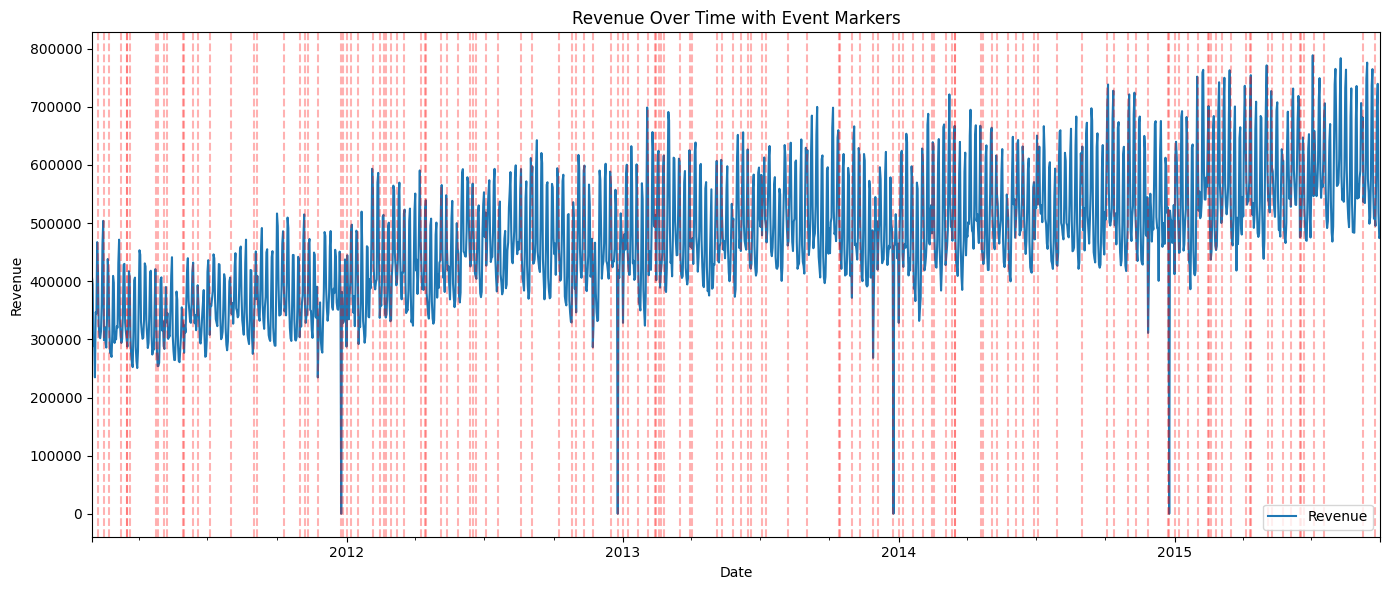

=== EVENT SIGNIFICANCE ANALYSIS ===


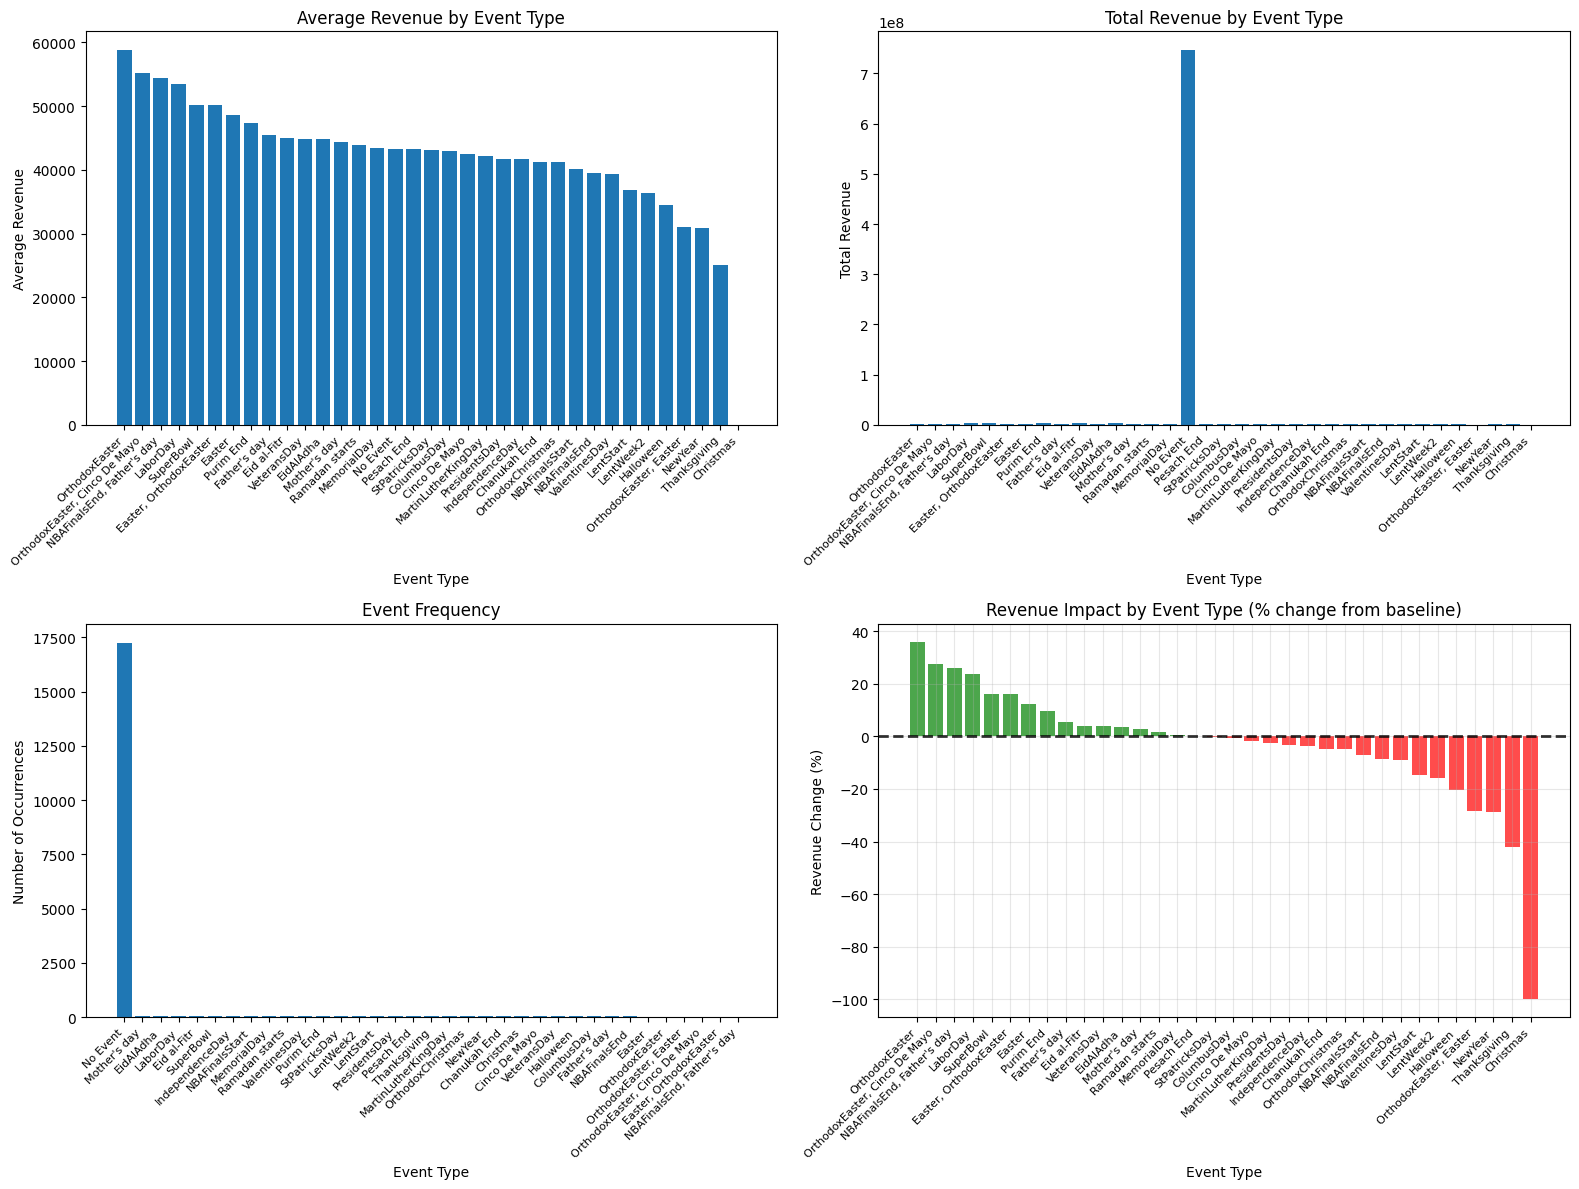


EVENT IMPACT ANALYSIS - BOTH POSITIVE AND NEGATIVE

🟢 POSITIVE IMPACT EVENTS (15 events):
--------------------------------------------------
OrthodoxEaster           :  +35.9% lift (Avg: $58,807, n=22)
OrthodoxEaster, Cinco De Mayo:  +27.6% lift (Avg: $55,183, n=11)
NBAFinalsEnd, Father's day:  +25.8% lift (Avg: $54,430, n=11)
LaborDay                 :  +23.8% lift (Avg: $53,553, n=55)
SuperBowl                :  +16.1% lift (Avg: $50,211, n=55)
Easter, OrthodoxEaster   :  +15.9% lift (Avg: $50,131, n=11)
Easter                   :  +12.4% lift (Avg: $48,647, n=33)
Purim End                :   +9.5% lift (Avg: $47,389, n=55)
Father's day             :   +5.2% lift (Avg: $45,532, n=44)
Eid al-Fitr              :   +3.9% lift (Avg: $44,929, n=55)
VeteransDay              :   +3.8% lift (Avg: $44,922, n=44)
EidAlAdha                :   +3.6% lift (Avg: $44,823, n=55)
Mother's day             :   +2.7% lift (Avg: $44,438, n=55)
Ramadan starts           :   +1.4% lift (Avg: $43,886, n=55)

<Figure size 1800x1000 with 0 Axes>

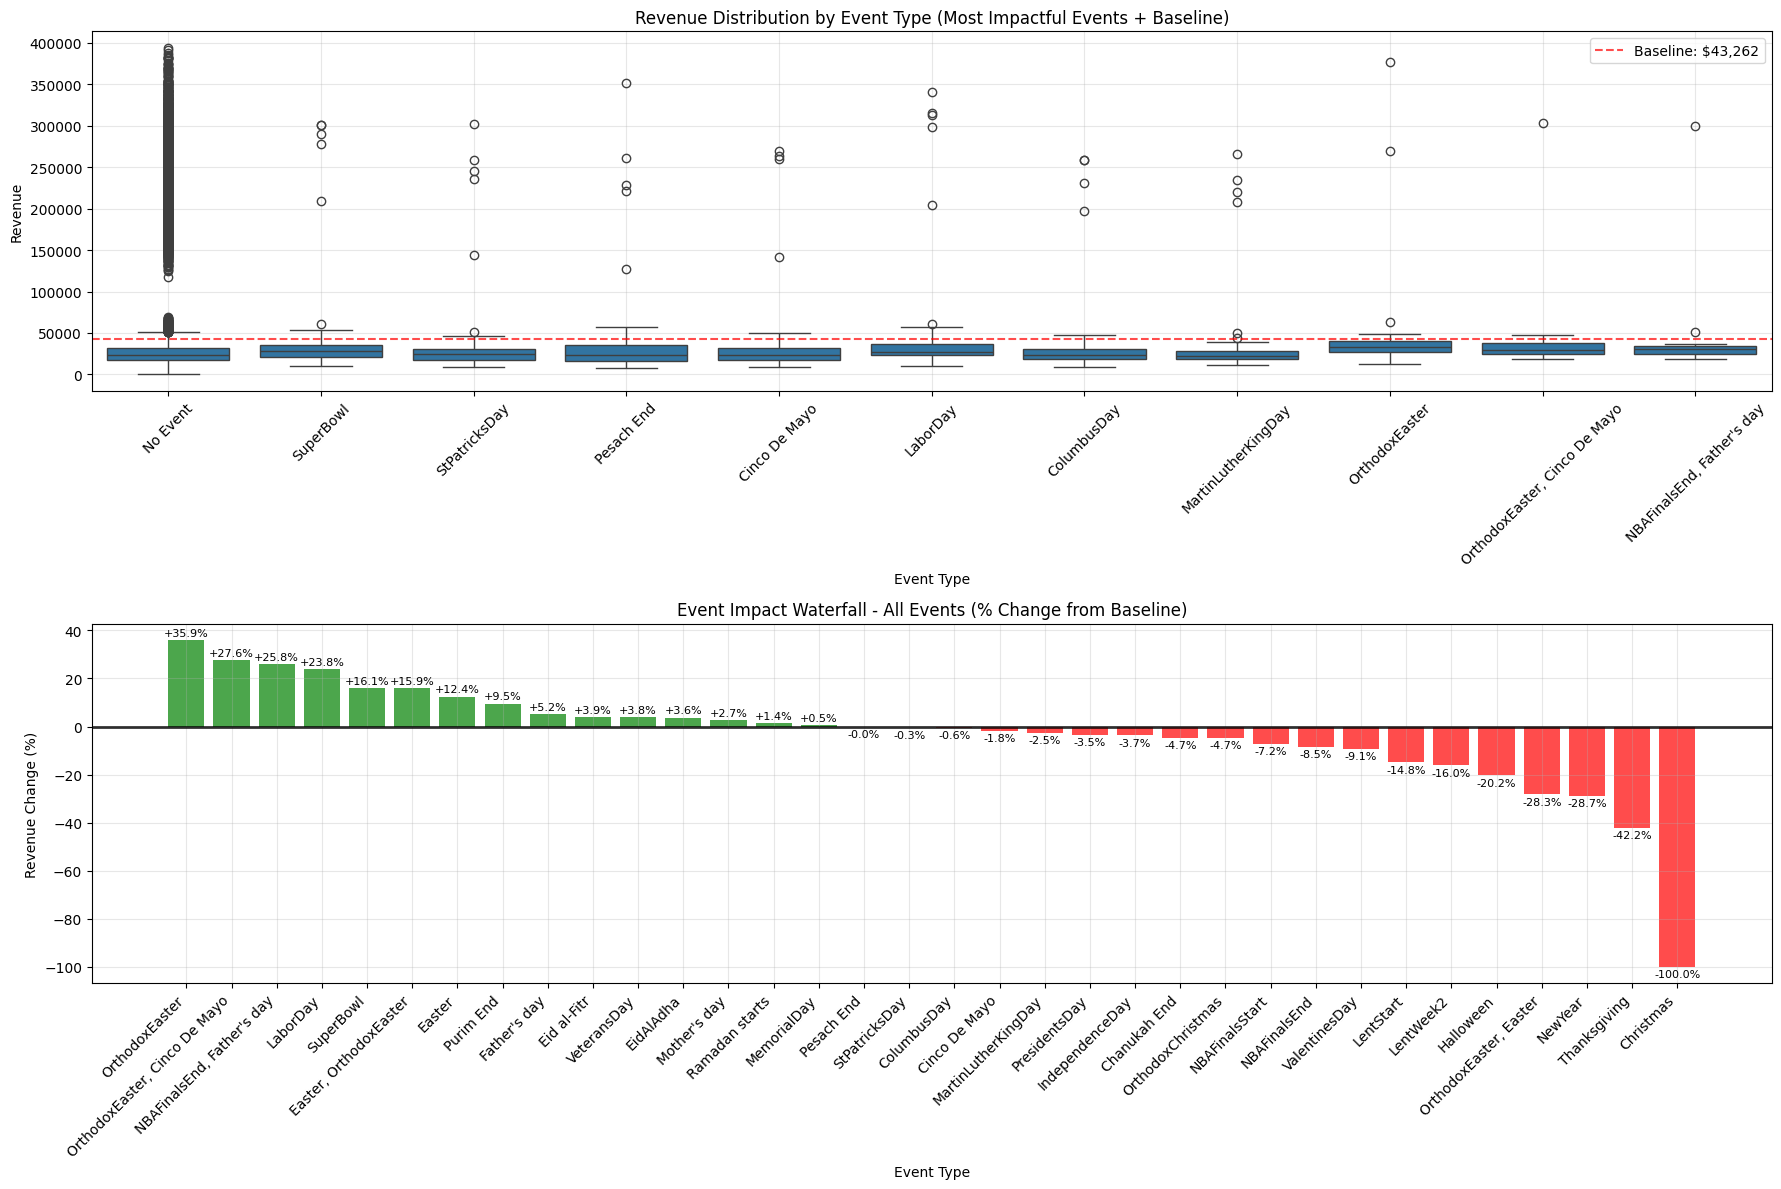

In [8]:
revenue_by_day = df.groupby('date')['revenue'].sum()

# Plot
plt.figure(figsize=(14, 6))
revenue_by_day.plot(label='Revenue')
plt.title("Revenue Over Time with Event Markers")
plt.xlabel("Date")
plt.ylabel("Revenue")

# Mark events on the plot
event_dates = events['date']
for d in event_dates:
    plt.axvline(d, color='red', linestyle='--', alpha=0.3)

plt.legend()
plt.tight_layout()
plt.show()

# Additional analysis of event significance
print("=== EVENT SIGNIFICANCE ANALYSIS ===")

# 1. Revenue comparison by event type
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Prepare data for event analysis
df_with_events = df.copy()
df_with_events['event_type'] = df_with_events['event'].fillna('No Event')

# 1a. Average revenue by event type
event_revenue = df_with_events.groupby('event_type')['revenue'].agg(['mean', 'sum', 'count']).reset_index()
event_revenue = event_revenue.sort_values('mean', ascending=False)

axes[0,0].bar(range(len(event_revenue)), event_revenue['mean'])
axes[0,0].set_title('Average Revenue by Event Type')
axes[0,0].set_ylabel('Average Revenue')
axes[0,0].set_xlabel('Event Type')
axes[0,0].tick_params(axis='x', rotation=45, labelsize=8)
axes[0,0].set_xticks(range(len(event_revenue)))
axes[0,0].set_xticklabels(event_revenue['event_type'], rotation=45, ha='right')

# 1b. Total revenue impact by event type
axes[0,1].bar(range(len(event_revenue)), event_revenue['sum'])
axes[0,1].set_title('Total Revenue by Event Type')
axes[0,1].set_ylabel('Total Revenue')
axes[0,1].set_xlabel('Event Type')
axes[0,1].tick_params(axis='x', rotation=45, labelsize=8)
axes[0,1].set_xticks(range(len(event_revenue)))
axes[0,1].set_xticklabels(event_revenue['event_type'], rotation=45, ha='right')

# 1c. Event frequency
event_counts = df_with_events['event_type'].value_counts()
axes[1,0].bar(range(len(event_counts)), event_counts.values)
axes[1,0].set_title('Event Frequency')
axes[1,0].set_ylabel('Number of Occurrences')
axes[1,0].set_xlabel('Event Type')
axes[1,0].tick_params(axis='x', rotation=45, labelsize=8)
axes[1,0].set_xticks(range(len(event_counts)))
axes[1,0].set_xticklabels(event_counts.index, rotation=45, ha='right')

# 1d. Revenue lift calculation (% change from baseline - BOTH positive and negative)
baseline_revenue = df_with_events[df_with_events['event_type'] == 'No Event']['revenue'].mean()
event_revenue['revenue_lift'] = ((event_revenue['mean'] - baseline_revenue) / baseline_revenue * 100)
# Sort by absolute impact to show both positive and negative effects
event_revenue_sorted = event_revenue[event_revenue['event_type'] != 'No Event'].sort_values('revenue_lift', ascending=False)

# Create color map: green for positive, red for negative
colors = ['green' if x > 0 else 'red' for x in event_revenue_sorted['revenue_lift']]

axes[1,1].bar(range(len(event_revenue_sorted)), event_revenue_sorted['revenue_lift'], color=colors, alpha=0.7)
axes[1,1].set_title('Revenue Impact by Event Type (% change from baseline)')
axes[1,1].set_ylabel('Revenue Change (%)')
axes[1,1].set_xlabel('Event Type')
axes[1,1].tick_params(axis='x', rotation=45, labelsize=8)
axes[1,1].set_xticks(range(len(event_revenue_sorted)))
axes[1,1].set_xticklabels(event_revenue_sorted['event_type'], rotation=45, ha='right')
axes[1,1].axhline(y=0, color='black', linestyle='--', alpha=0.8, linewidth=2)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print ALL events with their directional impact
print("\n" + "="*70)
print("EVENT IMPACT ANALYSIS - BOTH POSITIVE AND NEGATIVE")
print("="*70)

# Separate positive and negative impacts
positive_events = event_revenue_sorted[event_revenue_sorted['revenue_lift'] > 0]
negative_events = event_revenue_sorted[event_revenue_sorted['revenue_lift'] < 0]
neutral_events = event_revenue_sorted[event_revenue_sorted['revenue_lift'] == 0]

print(f"\n🟢 POSITIVE IMPACT EVENTS ({len(positive_events)} events):")
print("-" * 50)
for idx, row in positive_events.iterrows():
    print(f"{row['event_type']:25s}: {row['revenue_lift']:+6.1f}% lift (Avg: ${row['mean']:,.0f}, n={row['count']})")

if len(negative_events) > 0:
    print(f"\n🔴 NEGATIVE IMPACT EVENTS ({len(negative_events)} events):")
    print("-" * 50)
    for idx, row in negative_events.iterrows():
        print(f"{row['event_type']:25s}: {row['revenue_lift']:+6.1f}% drop (Avg: ${row['mean']:,.0f}, n={row['count']})")

if len(neutral_events) > 0:
    print(f"\n⚪ NEUTRAL IMPACT EVENTS ({len(neutral_events)} events):")
    print("-" * 50)
    for idx, row in neutral_events.iterrows():
        print(f"{row['event_type']:25s}: {row['revenue_lift']:+6.1f}% change (Avg: ${row['mean']:,.0f}, n={row['count']})")

print(f"\n📊 BASELINE (No Event): ${baseline_revenue:,.0f}")

# Summary statistics
total_positive_lift = positive_events['revenue_lift'].sum()
total_negative_impact = negative_events['revenue_lift'].sum() if len(negative_events) > 0 else 0
print(f"\n📈 SUMMARY:")
print(f"   Total Positive Lift: {total_positive_lift:+.1f}%")
print(f"   Total Negative Impact: {total_negative_impact:+.1f}%")
print(f"   Net Event Impact: {total_positive_lift + total_negative_impact:+.1f}%")

# Print the 10 MOST SIGNIFICANT events (highest absolute impact)
print(f"\n" + "="*80)
print("🎯 TOP 10 MOST SIGNIFICANT EVENTS (Highest Absolute Impact)")
print("="*80)

# Sort by absolute impact to get most significant events
event_revenue_abs_sorted = event_revenue_sorted.copy()
event_revenue_abs_sorted['abs_impact'] = abs(event_revenue_abs_sorted['revenue_lift'])
top_10_significant = event_revenue_abs_sorted.nlargest(10, 'abs_impact')

for i, (idx, row) in enumerate(top_10_significant.iterrows(), 1):
    impact_direction = "📈" if row['revenue_lift'] > 0 else "📉"
    impact_word = "BOOST" if row['revenue_lift'] > 0 else "DROP"
    print(f"{i:2d}. {impact_direction} {row['event_type']:25s}: {row['revenue_lift']:+7.1f}% {impact_word} "
          f"(Avg: ${row['mean']:7,.0f}, n={row['count']:2d})")

print(f"\n📊 For comparison, baseline revenue: ${baseline_revenue:,.0f}")
print(f"💡 These events should be HIGH PRIORITY for your forecasting models!")

# 2. Enhanced Box plot showing revenue distribution - including negative events
plt.figure(figsize=(18, 10))

# Select most impactful events (both positive and negative)
top_positive = positive_events.head(5)['event_type'].tolist()
top_negative = negative_events.head(5)['event_type'].tolist() if len(negative_events) > 0 else []
significant_events = top_positive + top_negative + ['No Event']

df_plot = df_with_events[df_with_events['event_type'].isin(significant_events)]

import seaborn as sns

# Create subplot with two plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

# Plot 1: Box plot of revenue distribution
sns.boxplot(data=df_plot, x='event_type', y='revenue', ax=ax1)
ax1.set_title('Revenue Distribution by Event Type (Most Impactful Events + Baseline)')
ax1.set_xlabel('Event Type')
ax1.set_ylabel('Revenue')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Add baseline line
ax1.axhline(y=baseline_revenue, color='red', linestyle='--', alpha=0.7, label=f'Baseline: ${baseline_revenue:,.0f}')
ax1.legend()

# Plot 2: Revenue impact waterfall chart
event_impacts = event_revenue_sorted['revenue_lift'].values
event_names = event_revenue_sorted['event_type'].values
colors_waterfall = ['green' if x > 0 else 'red' for x in event_impacts]

bars = ax2.bar(range(len(event_impacts)), event_impacts, color=colors_waterfall, alpha=0.7)
ax2.set_title('Event Impact Waterfall - All Events (% Change from Baseline)')
ax2.set_ylabel('Revenue Change (%)')
ax2.set_xlabel('Event Type')
ax2.set_xticks(range(len(event_impacts)))
ax2.set_xticklabels(event_names, rotation=45, ha='right')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=2)
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, impact in zip(bars, event_impacts):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + (1 if height > 0 else -1),
             f'{impact:+.1f}%', ha='center', va='bottom' if height > 0 else 'top', fontsize=8)

plt.tight_layout()
plt.show()

## Modeling

### XGBOOST

🏗️  DataProcessorBuilder initialized with empty pipeline
   ⏰ Configuring time features...
   📈 Configuring lag features: [7, 14, 28]
   📊 Configuring rolling features: [14, 28]
   🎉 Configuring event features for 10 significant events
   🌍 Configuring country features...
   🍂 Configuring season features...
🏗️  XGBoostModel initialized with provided DataProcessorBuilder
🏗️  Creating features using provided DataProcessorBuilder for training...
🔧 Processing dataframe with 18766 rows using configured pipeline...
   ✅ Data processing complete!
   📊 Clean data: 1474 rows (after removing NaN)
   🔧 Using 39 features
   📅 Training period: 2011-03-09 00:00:00 to 2015-09-24 00:00:00
   📈 Total training samples: 1474
   🔄 Training Gradient Boosting Model...

📊 Model Performance (Training Data):
   🎯 Train MAE: $211
   📏 Train RMSE: $257
   📈 Train R²: 1.000

🔝 Top 15 Most Important Features:
--------------------------------------------------
   revenue_lag_28           : 0.662
   revenue_rolling_

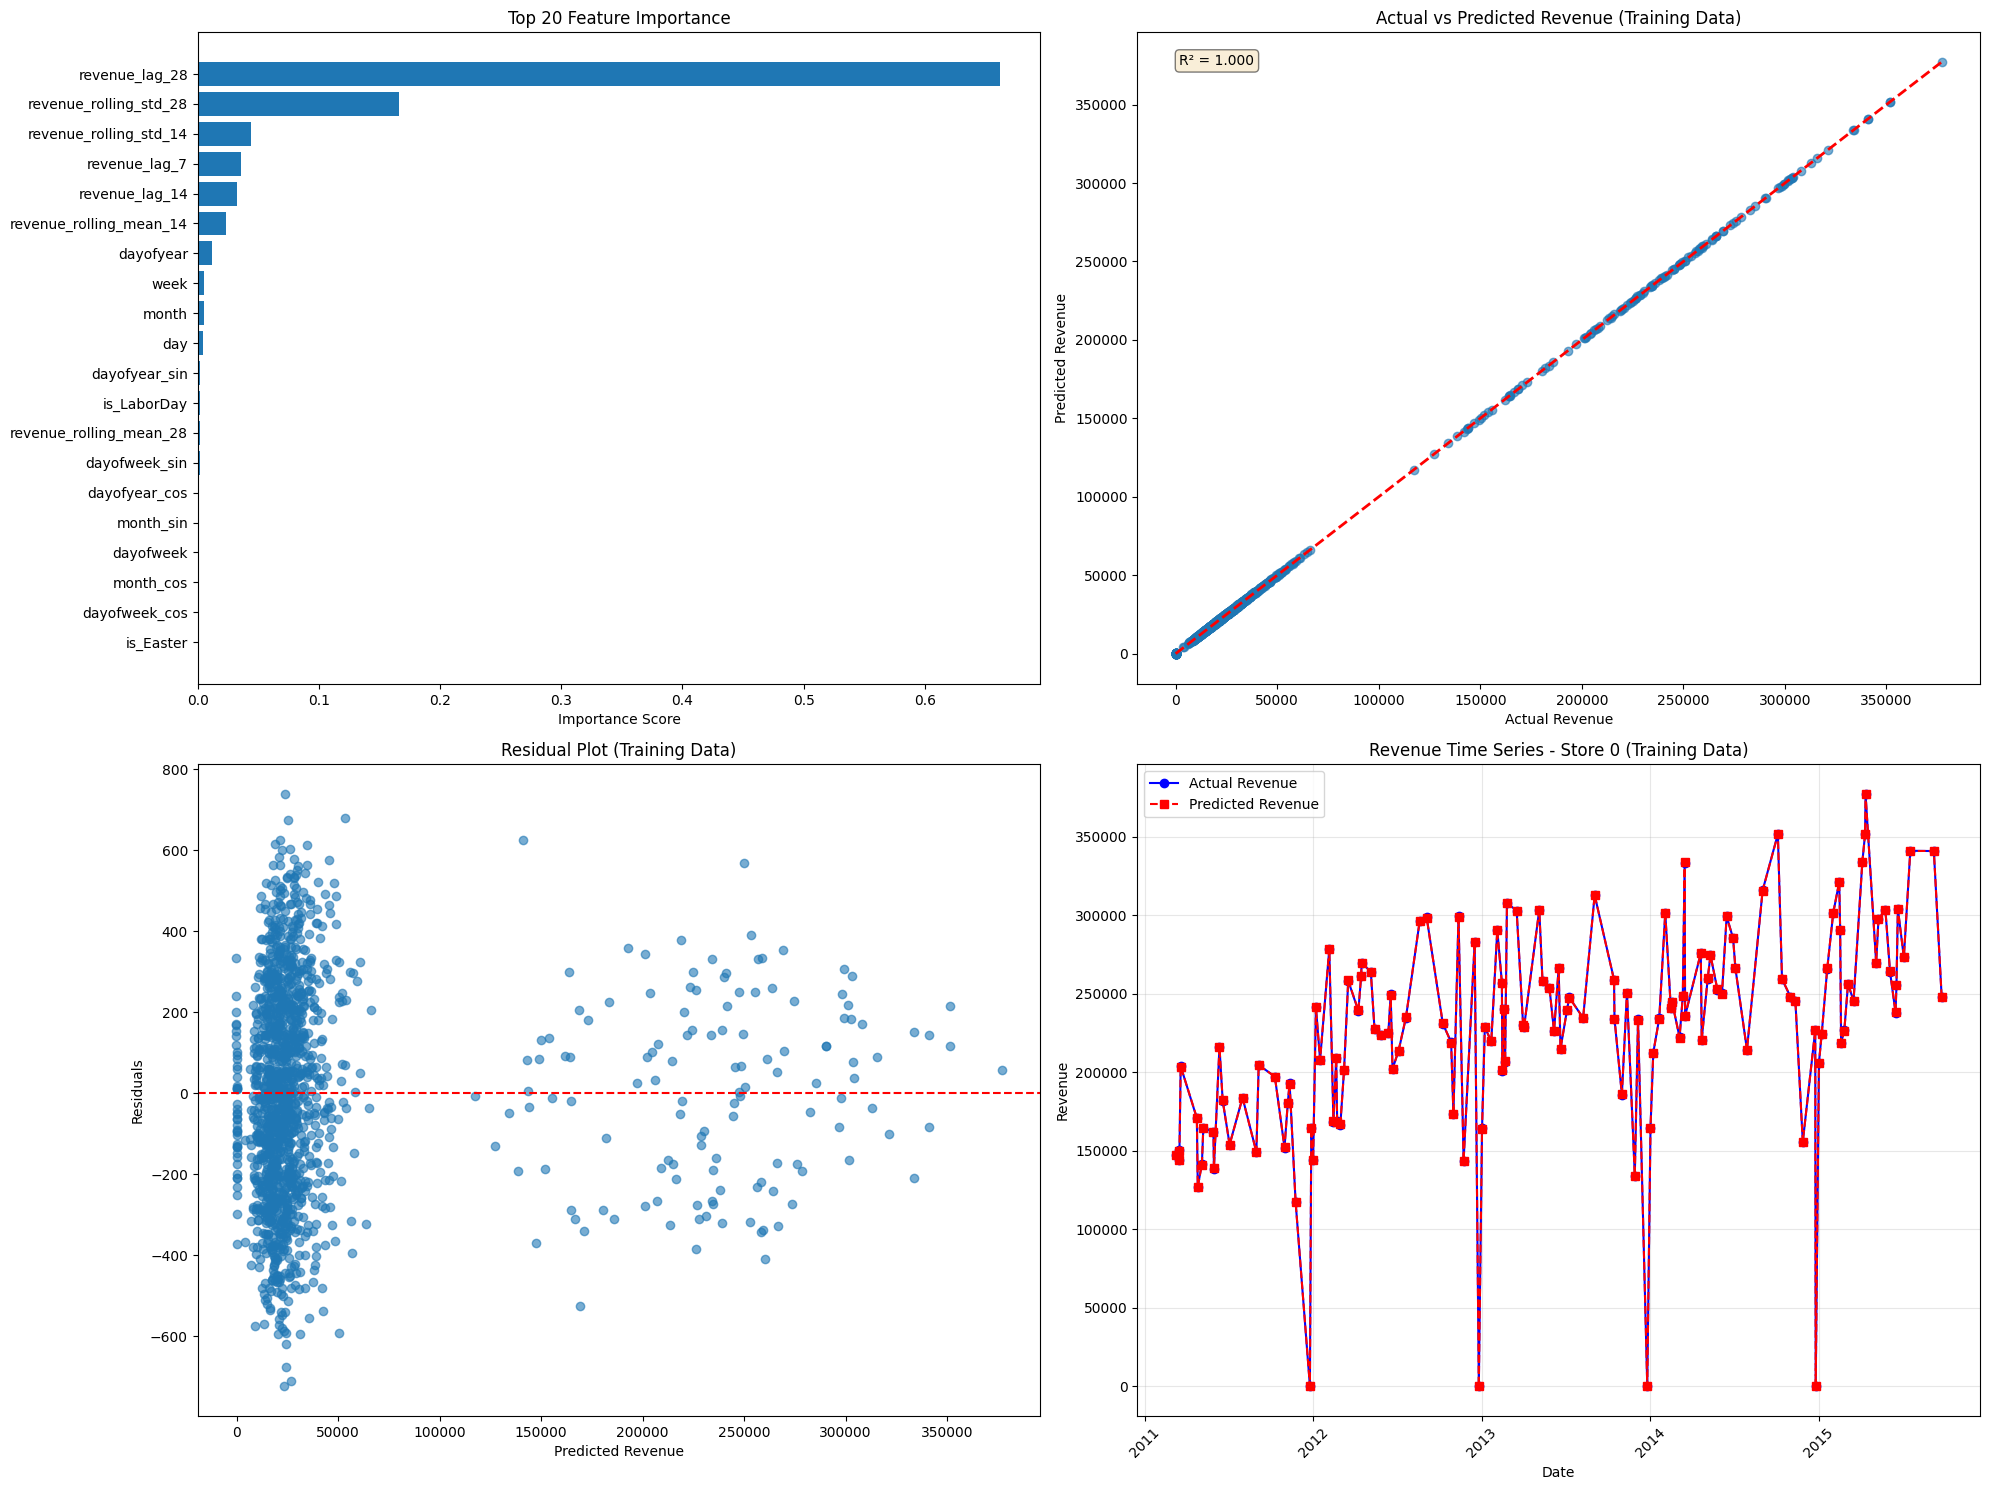

In [9]:
from main import XGBoostModel, DataProcessorBuilder
import matplotlib.pyplot as plt

# Ensure matplotlib displays plots inline in Jupyter
%matplotlib inline

TOP_SIGNIFICANT_EVENTS = [
    'OrthodoxEaster',
    'OrthodoxEaster, Cinco De Mayo',
    'NBAFinalsEnd, Father\'s day',
    'LaborDay',
    'SuperBowl',
    'Easter, OrthodoxEaster',
    'Easter',
    'Purim End',
    'Father\'s day',
    'Eid al-Fitr'
]
data_processor = (DataProcessorBuilder()
    .add_time_features()
    .add_lag_features(lags=[7, 14, 28])
    .add_rolling_features(windows=[14, 28])
    .add_event_features(significant_events=TOP_SIGNIFICANT_EVENTS)
    .add_country_features()
    .add_season_features()
)

model = XGBoostModel(df, data_processor)
model.train_gradient_boosting_model(df)
model.evaluate_model_performance(df)
model.plot_model_results()
